# Transport across sections

`mom6_tools.section_transports` collection of functions for computing and plotting time-series of transports across pre-defined vertical sections.

The goal of this notebook is the following:

1) server as an example on how to post-process the CESM/MOM6 vertical sections defined in diag_table. The location of the current vertical sections computed online can be found at the end of [this notebook](https://gist.github.com/gustavo-marques/bd6e9bb43062dcbc2abda91b757c7c4b); 

2) evaluate model experiments by comparing transports against observed estimates;

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from mom6_tools.section_transports import Transport, options
import matplotlib.pyplot as plt
from mom6_tools.DiagsCase import DiagsCase
import xarray as xr
import yaml, os, numpy

In [3]:
# Read in the yaml file
diag_config_yml_path = "diag_config.yml"
diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

In [4]:
# Create the case instance
dcase = DiagsCase(diag_config_yml['Case'])
DOUT_S = dcase.get_value('DOUT_S')
if DOUT_S:
  OUTDIR = dcase.get_value('DOUT_S_ROOT')+'/ocn/hist/'
else:
  OUTDIR = dcase.get_value('RUNDIR')+'/'

print('Output directory is:', OUTDIR)
print('Casename is:', dcase.casename)

Output directory is: /glade/scratch/gmarques/archive/g.e23_b15.GJRAv4.TL319_t232_zstar_N65.baseline.001/ocn/hist/
Casename is: g.e23_b15.GJRAv4.TL319_t232_zstar_N65.baseline.001


In [5]:
# load sections where transports are computed online
sections = diag_config_yml['Transports']['sections']

In [6]:
# create an empty class object
class args:
  pass

Define the arguments expected by class "Transport". These have been hard-coded here fow now...

In [7]:
args.case_name = dcase.casename
args.infile = OUTDIR
# set avg dates
avg = diag_config_yml['Avg']
args.start_date = '0001-01-01' # override start date
args.end_date = avg['end_date']
args.label = ''
args.debug = False

Observed flows, more options can be added here

* Griffies et al., 2016: OMIP contribution to CMIP6: experimental and diagnostic protocol for the physical component of the Ocean Model Intercomparison Project. Geosci. Model. Dev., 9, 3231-3296. doi:10.5194/gmd-9-3231-2016

Below we define a function for plotting transport time series. Note the following:

<span style="color:green">green = mean transport is within observed values</span> 

<span style="color:red">red    = mean transport is not within observed values</span> 

<span style="color:gray">gray  = either there isn't observed values to compare with or just a mean value is available (not a range)</span> 

In [8]:
def plotPanel(section,observedFlows=None,colorCode=True):
    ax = plt.subplot(1,1,1)
    color = '#c3c3c3'; obsLabel = None
    if section.label in observedFlows.keys():
      if isinstance(observedFlows[section.label][1:],list) and isinstance(observedFlows[section.label][1:][0],float):
        if colorCode == True:
          if min(observedFlows[section.label][1:]) <= section.data.mean() <= max(observedFlows[section.label][1:]):
            color = '#90ee90'
          else: color = '#f26161'; print('here3')
        obsLabel = str(min(observedFlows[section.label][1:])) + ' to ' + str(max(observedFlows[section.label][1:]))
      else: obsLabel = str(observedFlows[section.label][1:]); print('here4')
    plt.plot(section.time,section.data,color=color)
    plt.title(section.label,fontsize=14)
    plt.text(0.04,0.11,'Mean = '+'{0:.2f}'.format(section.data.mean()),transform=ax.transAxes,fontsize=14)
    if obsLabel is not None: plt.text(0.04,0.04,'Obs. = '+obsLabel,transform=ax.transAxes,fontsize=14)
    if section.ylim is not None: plt.ylim(section.ylim)
    plt.ylabel('Transport (Sv)',fontsize=14); plt.xlabel('Time since beginning of run (yr)',fontsize=14)
    plt.grid()
    return

Plot section transports in alphabetical order

### Agulhas Section

here3


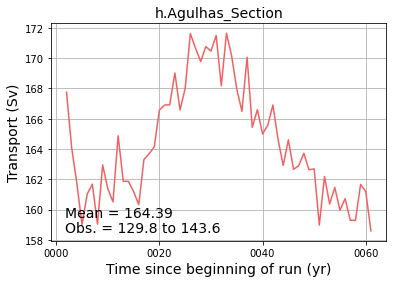

In [9]:
%matplotlib inline
ds = []
agulhas = Transport(args,sections,'h.Agulhas_Section',debug=False); ds.append(agulhas)
plotPanel(agulhas, observedFlows=sections)

### Bering Strait

here3


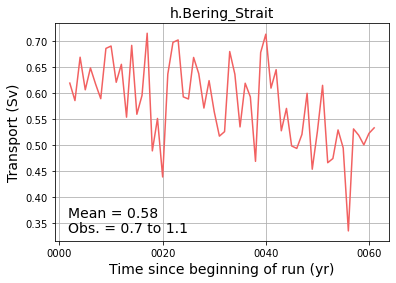

In [10]:
bering = Transport(args, sections, 'h.Bering_Strait'); ds.append(bering)
plotPanel(bering, observedFlows=sections)

### Barents opening

here3


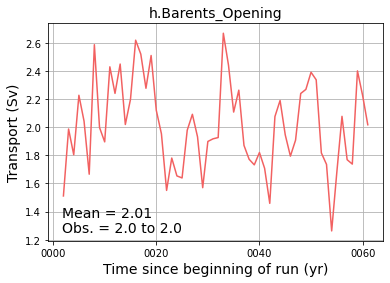

In [11]:
barents = Transport(args, sections, 'h.Barents_Opening'); ds.append(barents)
plotPanel(barents, observedFlows=sections)

### Davis Strait

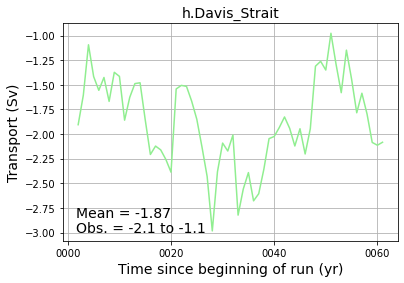

In [12]:
davis = Transport(args, sections,'h.Davis_Strait'); ds.append(davis)
plotPanel(davis, observedFlows=sections)

### Denmark Strait

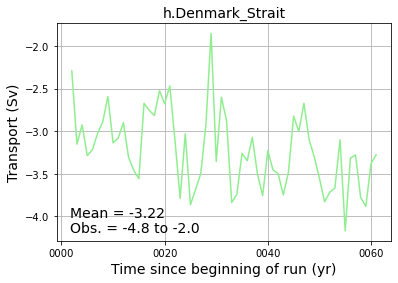

In [13]:
denmark = Transport(args, sections,'h.Denmark_Strait'); ds.append(denmark)
plotPanel(denmark, observedFlows=sections)

### Drake Passage

here3


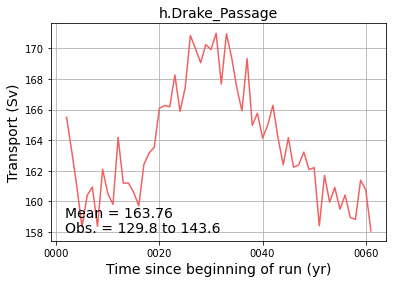

In [14]:
drake = Transport(args, sections,'h.Drake_Passage'); ds.append(drake)
plotPanel(drake, observedFlows=sections)

### English Channel

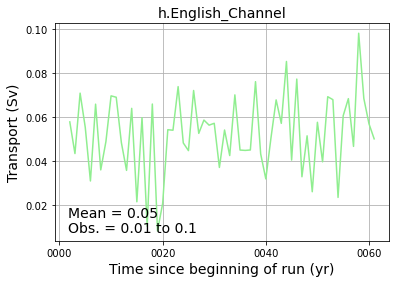

In [15]:
english = Transport(args, sections, 'h.English_Channel'); ds.append(english)
plotPanel(english, observedFlows=sections)

### Fram Strait

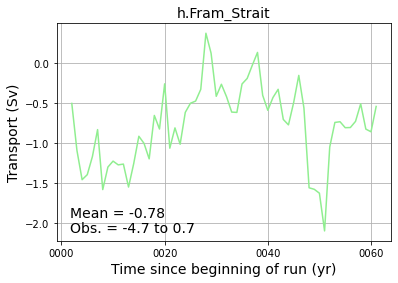

In [16]:
fram = Transport(args, sections, 'h.Fram_Strait'); ds.append(fram)
plotPanel(fram, observedFlows=sections)

### Florida Bahamas

In [20]:
#florida1 = Transport(args, sections, 'h.Florida_Bahamas', debug=True); ds.append(florida1)
#plotPanel(florida1, observedFlows=sections)

### Florida Bahamas extended

here3


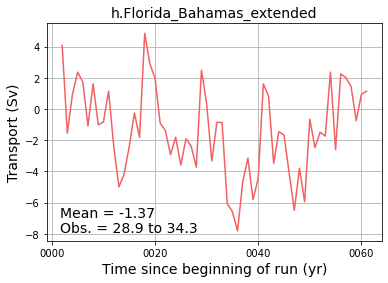

In [21]:
florida2 = Transport(args, sections, 'h.Florida_Bahamas_extended'); ds.append(florida2)
plotPanel(florida2, observedFlows=sections)

### Florida Cuba

here4


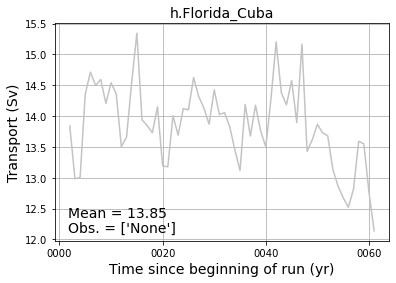

In [22]:
florida3 = Transport(args, sections, 'h.Florida_Cuba'); ds.append(florida3)
plotPanel(florida3, observedFlows=sections)

### Gibraltar Strait

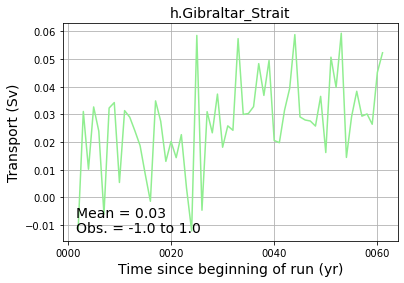

In [23]:
gibraltar = Transport(args, sections, 'h.Gibraltar_Strait'); ds.append(gibraltar)
plotPanel(gibraltar, observedFlows=sections)

### Iceland Norway

here3


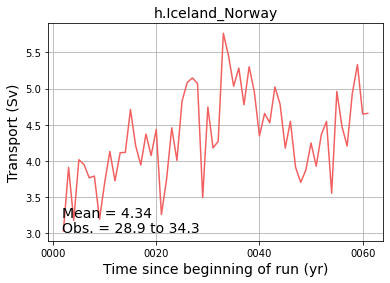

In [24]:
iceland = Transport(args, sections, 'h.Iceland_Norway'); ds.append(iceland)
plotPanel(iceland, observedFlows=sections) 

### Indonesian Throughflow

here3


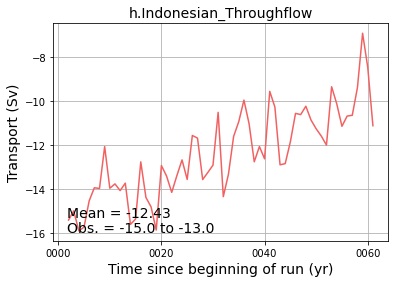

In [25]:
indo = Transport(args, sections, 'h.Indonesian_Throughflow'); ds.append(indo)
plotPanel(indo, observedFlows=sections)

### Mozambique Channel

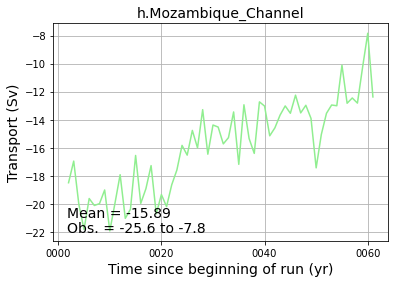

In [26]:
mozambique = Transport(args, sections, 'h.Mozambique_Channel'); ds.append(mozambique)
plotPanel(mozambique, observedFlows=sections)

### Pacific undercurrent

here3


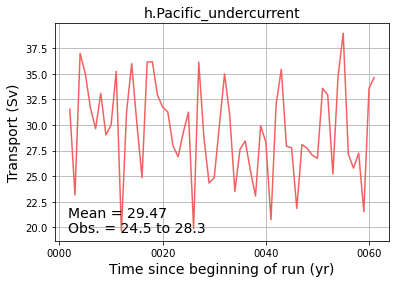

In [27]:
euc = Transport(args, sections, 'h.Pacific_undercurrent'); ds.append(euc)
plotPanel(euc, observedFlows=sections)

### Taiwan Luzon

here3


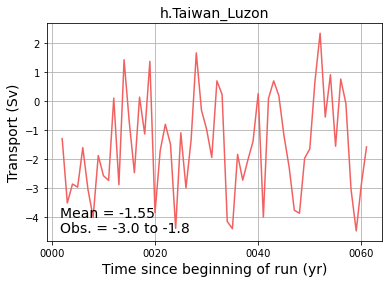

In [28]:
taiwan = Transport(args, sections, 'h.Taiwan_Luzon'); ds.append(taiwan)
plotPanel(taiwan, observedFlows=sections)

### Windward Passage

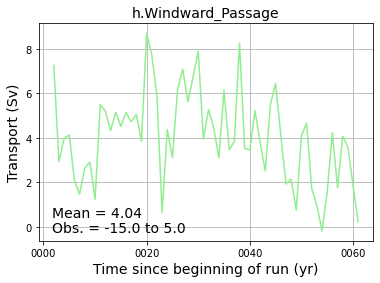

In [29]:
windward = Transport(args, sections, 'h.Windward_Passage'); ds.append(windward)
plotPanel(windward, observedFlows=sections)

### Robeson_Channel

here4


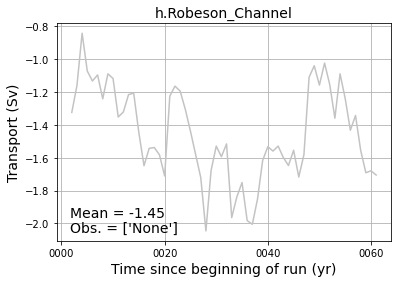

In [30]:
roberson = Transport(args, sections, 'h.Robeson_Channel'); ds.append(roberson)
plotPanel(roberson, observedFlows=sections)

### Yucatan_Channel

here4


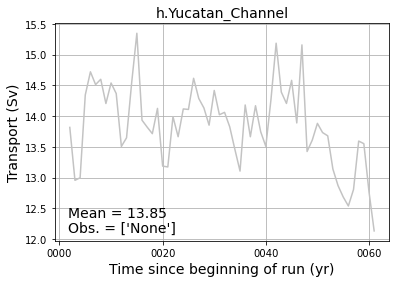

In [31]:
yucatan = Transport(args, sections, 'h.Yucatan_Channel'); ds.append(yucatan)
plotPanel(yucatan, observedFlows=sections)

### Bosporus_Strait

here4


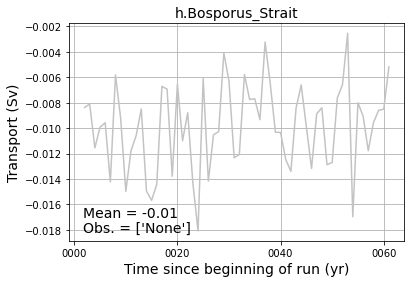

In [32]:
bosporus = Transport(args, sections, 'h.Bosporus_Strait'); ds.append(bosporus)
plotPanel(bosporus, observedFlows=sections)

### Save netcdf

In [33]:
print('Saving netCDF file with transports...\n')
if not os.path.isdir('ncfiles'):
      os.system('mkdir -p ncfiles')
        
# create a dataaray
labels = [];
for n in range(len(ds)): labels.append(ds[n].label)
var = numpy.zeros((len(ds),len(ds[0].time)))
ds_out = xr.Dataset(data_vars={ 'transport' : (('sections', 'time'), var)},
                       coords={'sections': labels,
                               'time': ds[0].time})
for n in range(len(ds)):
  ds_out.transport.values[n,:] = ds[n].data

ds_out.to_netcdf('ncfiles/'+dcase.casename+'_section_transports.nc')

Saving netCDF file with transports...

